In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [2]:
df_train = pd.read_csv("sigma_cabs.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_test["Surge_Pricing_Type"] = np.nan
df_train["data"] = "train"
df_test["data"] = "test"
df_test = df_test[df_train.columns]
df_all = pd.concat([df_train,df_test],axis=0)

In [5]:
df_all.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,data
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0,train
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0,train
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0,train
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0,train
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0,train


In [6]:
df_all.shape

(219057, 15)

In [7]:
df_all["Type_of_Cab"].fillna("F",inplace=True)

In [8]:
df_all["Confidence_Life_Style_Index"].fillna("D",inplace=True)

In [9]:
df_all["Customer_Since_Months"].fillna(df_all["Customer_Since_Months"].mode()[0],inplace=True)
df_all["Customer_Since_Months"] = df_all["Customer_Since_Months"].astype(int)

In [10]:
cols = ["Life_Style_Index"]
for col in cols:
    if (col not in ['Surge_Pricing_Type','data']) & (df_all[col].isnull().sum()>0):
        df_all.loc[df_all[col].isnull(),col]=df_all.loc[df_all['data']=='train',col].mean()

In [11]:
df_all = df_all.drop("Var1",axis=1)

In [12]:
df_all.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type             87395
data                               0
dtype: int64

In [13]:
# cols = ['Trip_Distance', 'Life_Style_Index','Customer_Rating', 'Var2', 'Var3']
# for col in cols:
#     sns.boxplot(df_all[col])
#     plt.show()

###### Inference
- There are Outliers in Life_Style_Index, Var2 and Var3

In [13]:
### Before Transformation
import scipy.stats as stats
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    print(i)
    print("The Skewness of",i,"is",df_all[i].skew())
    print("The P-value of",i,"is",stats.shapiro(df_all[i])[1])
    print()

Cancellation_Last_1Month
The Skewness of Cancellation_Last_1Month is 1.5442596931085575
The P-value of Cancellation_Last_1Month is 0.0

Customer_Since_Months
The Skewness of Customer_Since_Months is -0.3173114142069423
The P-value of Customer_Since_Months is 0.0

Trip_Distance
The Skewness of Trip_Distance is 0.7260082783456537
The P-value of Trip_Distance is 0.0

Life_Style_Index
The Skewness of Life_Style_Index is 0.22502850608191527
The P-value of Life_Style_Index is 0.0

Customer_Rating
The Skewness of Customer_Rating is -0.19266505605334006
The P-value of Customer_Rating is 0.0

Var2
The Skewness of Var2 is 1.1679649458886794
The P-value of Var2 is 0.0

Var3
The Skewness of Var3 is 0.8190389815207447
The P-value of Var3 is 0.0



In [14]:
### Transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    df_all[i]=pt.fit_transform(df_all[[i]])

In [15]:
import scipy.stats as stats
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    print(i)
    print("The Skewness of",i,"is",df_all[i].skew())
    print("The P-value of",i,"is",stats.shapiro(df_all[i])[1])
    print()

Cancellation_Last_1Month
The Skewness of Cancellation_Last_1Month is 0.2792420184089618
The P-value of Cancellation_Last_1Month is 0.0

Customer_Since_Months
The Skewness of Customer_Since_Months is -0.353667745742443
The P-value of Customer_Since_Months is 0.0

Trip_Distance
The Skewness of Trip_Distance is -0.04037405986680118
The P-value of Trip_Distance is 0.0

Life_Style_Index
The Skewness of Life_Style_Index is 0.008721400833871068
The P-value of Life_Style_Index is 0.0

Customer_Rating
The Skewness of Customer_Rating is -0.07450227371179766
The P-value of Customer_Rating is 0.0

Var2
The Skewness of Var2 is 0.02276155703046413
The P-value of Var2 is 0.0

Var3
The Skewness of Var3 is 0.018781132084892058
The P-value of Var3 is 0.0



In [16]:
df_all.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,data
0,T0005689460,-2.050146,B,-1.436342,-1.848467,A,A,1.088112,-0.928235,-1.195084,-1.532008,Female,2.0,train
1,T0005689461,-0.447807,B,1.037875,-0.077120,B,A,0.601133,-0.928235,1.059582,0.401783,Male,2.0,train
2,T0005689464,0.083351,F,1.037875,0.017305,D,E,0.655500,1.284153,1.059582,0.317685,Male,2.0,train
3,T0005689465,0.780487,C,1.037875,0.017305,D,A,0.605107,-0.928235,0.345241,0.051987,Male,3.0,train
4,T0005689467,0.567899,C,1.037875,1.110910,B,A,0.550857,1.736303,-0.338789,1.931748,Male,2.0,train


In [253]:
# cols = ['Life_Style_Index','Var2', 'Var3']
# for i in cols:
#     q1 = df_all[i].quantile(0.25)
#     q3 = df_all[i].quantile(0.75)
#     iqr = q3-q1
#     df_all[i] = df_all[i][~((df_all[i]<(q1-1.5*iqr)) | (df_all[i]>(q3+1.5*iqr)))]

In [254]:
# cols = ['Life_Style_Index','Var2', 'Var3']
# for col in cols:
#     sns.boxplot(df[col])
#     plt.show()

In [22]:
df_all.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type             87395
data                               0
dtype: int64

In [23]:
# df = df.dropna()

In [24]:
# df.isnull().sum()

In [25]:
df_all.shape

(219057, 14)

In [26]:
from scipy.stats import chi2_contingency
cat_cols = df_all.select_dtypes(exclude="number")
col_name = []
pvalue = []
significance = []
for col in cat_cols.columns:
    col_name.append(col)
    cs = chi2_contingency(pd.crosstab(df_all[i],df_all["Surge_Pricing_Type"]))[1]
    pvalue.append(round(cs, 4))
    if (cs<0.05):
        significance.append("Significant")
    else:
        significance.append("Insignificant")
        
pd.DataFrame({"Feature":col_name,"P-value":pvalue,"Significance":significance})

,Feature,P-value,Significance
0,Trip_ID,0.0,Significant
1,Type_of_Cab,0.0,Significant
2,Confidence_Life_Style_Index,0.0,Significant
3,Destination_Type,0.0,Significant
4,Gender,0.0,Significant
5,data,0.0,Significant


In [27]:
num_cols = df_all.select_dtypes(include="number")
col_name = []
pvalue = []
significance = []
for col in num_cols.columns[:-1]:
    col_name.append(col)
    g1 = df_all[col][df_all["Surge_Pricing_Type"]==1]
    g2 = df_all[col][df_all["Surge_Pricing_Type"]==2]
    g3 = df_all[col][df_all["Surge_Pricing_Type"]==3]
    f_st1,f_p1 = stats.levene(g1,g2,g3)
    if f_p1<0.05:
        f_st_k,f_p_k = stats.kruskal(g1,g2,g3)
        pvalue.append(round(f_p_k,4))
        if f_p_k<0.05:
            significance.append("significant")
        else:
            significance.append("Insignificant")
    if f_p1>0.05:
        f_st_f,f_p_f = stats.f_oneway(g1,g2,g3)
        pvalue.append(round(f_p_f,4))
        if f_p_f<0.05:
            significance.append("significant")
        else:
            significance.append("Insignificant")
pd.DataFrame({'Feature':col_name,'P_value':pvalue,'Significance':significance})

,Feature,P_value,Significance
0,Trip_Distance,0.0,significant
1,Customer_Since_Months,0.0,significant
2,Life_Style_Index,0.0,significant
3,Customer_Rating,0.0,significant
4,Cancellation_Last_1Month,0.0,significant
5,Var2,0.0,significant
6,Var3,0.0,significant


In [28]:
cat_cols=df_all.select_dtypes('object')
cat_cols.columns[1:-1]

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [29]:
for col in cat_cols.columns[1:-1]:
    print(col)
    print(df_all[col].value_counts())
    print()

Type_of_Cab
B    51585
C    46732
A    35878
F    33368
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

Confidence_Life_Style_Index
B    67265
C    59736
A    58536
D    33520
Name: Confidence_Life_Style_Index, dtype: int64

Destination_Type
A    129010
B     49193
C     12397
D     11085
E      4549
F      3222
G      2513
H      2124
I      1334
J      1166
K      1102
L      1052
M       160
N       150
Name: Destination_Type, dtype: int64

Gender
Male      156128
Female     62929
Name: Gender, dtype: int64



In [30]:
# you can use following method if you want to ignore categories with too low frequencies ,
#in next section for logistic regression we will be using  pandas' get dummies function. 
# you can work with either of these . 
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much 

for col in cat_cols.columns[1:-1]:
    freqs=df_all[col].value_counts()
    k=freqs.index[freqs>1000][:-1]
    for cat in k:
        name=col+'_'+cat
        df_all[name]=(df_all[col]==cat).astype(int)
    del df_all[col]
    print(col)

Type_of_Cab
Confidence_Life_Style_Index
Destination_Type
Gender


In [31]:
df_all.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,data,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689460,-2.050146,-1.436342,-1.848467,1.088112,-0.928235,-1.195084,-1.532008,2.0,train,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,-0.447807,1.037875,-0.077120,0.601133,-0.928235,1.059582,0.401783,2.0,train,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,0.083351,1.037875,0.017305,0.655500,1.284153,1.059582,0.317685,2.0,train,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,T0005689465,0.780487,1.037875,0.017305,0.605107,-0.928235,0.345241,0.051987,3.0,train,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,0.567899,1.037875,1.110910,0.550857,1.736303,-0.338789,1.931748,2.0,train,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [32]:
df_all.shape

(219057, 30)

In [33]:
df_train = df_all[df_all["data"]=="train"]
del df_train["data"]
df_test = df_all[df_all["data"]=="test"]
df_test.drop(["Surge_Pricing_Type","data"],axis=1,inplace=True)

In [34]:
df_train.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689460,-2.050146,-1.436342,-1.848467,1.088112,-0.928235,-1.195084,-1.532008,2.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,-0.447807,1.037875,-0.077120,0.601133,-0.928235,1.059582,0.401783,2.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,0.083351,1.037875,0.017305,0.655500,1.284153,1.059582,0.317685,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,T0005689465,0.780487,1.037875,0.017305,0.605107,-0.928235,0.345241,0.051987,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,0.567899,1.037875,1.110910,0.550857,1.736303,-0.338789,1.931748,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df_train.shape

(131662, 29)

In [36]:
df_train.isnull().sum()

Trip_ID                          0
Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var2                             0
Var3                             0
Surge_Pricing_Type               0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_A                    0
Type_of_Cab_F                    0
Type_of_Cab_D                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Confidence_Life_Style_Index_A    0
Destination_Type_A               0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Gender_Male         

In [37]:
df_test.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689459,-1.768505,1.037875,-1.100919,0.846098,1.284153,-1.195084,-1.134465,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,T0005689462,-0.320094,1.037875,0.253438,-1.271090,-0.928235,-0.338789,0.563772,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,T0005689463,-1.680368,-0.578396,-0.451948,1.744324,-0.928235,-0.887310,0.051987,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,T0005689466,-1.307791,-0.029264,-1.571190,1.771993,-0.928235,-2.282568,-2.456677,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,T0005689468,-0.325670,0.240869,0.084090,1.850991,1.566074,-1.889798,-2.126905,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [38]:
df_test.isnull().sum()

Trip_ID                          0
Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_A                    0
Type_of_Cab_F                    0
Type_of_Cab_D                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Confidence_Life_Style_Index_A    0
Destination_Type_A               0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Gender_Male                      0
dtype: int64

In [39]:
df_test.shape

(87395, 28)

In [40]:
df_train = df_train.drop("Gender_Male",axis=1)

In [41]:
x = df_train.drop(["Surge_Pricing_Type","Trip_ID"],axis=1)
y = df_train["Surge_Pricing_Type"]

In [28]:
import statsmodels.api as sm
xc = sm.add_constant(x)
model = sm.MNLogit(y,xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.720389
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:     Surge_Pricing_Type   No. Observations:               131662
Model:                        MNLogit   Df Residuals:                   131608
Method:                           MLE   Df Model:                           52
Date:                Thu, 01 Apr 2021   Pseudo R-squ.:                  0.3181
Time:                        12:36:42   Log-Likelihood:                -94848.
converged:                       True   LL-Null:                   -1.3910e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
         Surge_Pricing_Type=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.5361      0.123      4.349      0.000       0.294       0.778
Trip_Distance                     0.1067      0.011      9.407      0.000       0.085       0.129
Customer_Since_Months             0.0123      0.009      1.333      0.183      -0.006       0.030
Life_Style_Index                 -0.1854      0.011    -16.714      0.000      -0.207      -0.164
Customer_Rating                  -0.2718      0.011    -25.468      0.000      -0.293      -0.251
Cancellation_Last_1Month          0.2727      0.010     28.019      0.000       0.254       0.292
Var2                             -0.0029      0.013     -0.222      0.824      -0.028       0.022
Var3                             -0.2308      0.013    -17.636      0.000      -0.256      -0.205
Type_of_Cab_B                     0.9655      0.041     23.404      0.000       0.885       1.046
Type_of_Cab_C                     2.1355      0.050     42.917      0.000       2.038       2.233
Type_of_Cab_A                    -2.5288      0.044    -57.074      0.000      -2.616      -2.442
Type_of_Cab_F                     0.0754      0.043      1.772      0.076      -0.008       0.159
Type_of_Cab_D                     0.2089      0.053      3.945      0.000       0.105       0.313
Confidence_Life_Style_Index_B     0.2524      0.030      8.457      0.000       0.194       0.311
Confidence_Life_Style_Index_C     0.0785      0.029      2.695      0.007       0.021       0.136
Confidence_Life_Style_Index_A    -0.2059      0.028     -7.261      0.000      -0.262      -0.150
Destination_Type_A                0.3530      0.116      3.035      0.002       0.125       0.581
Destination_Type_B               -0.1219      0.117     -1.042      0.297      -0.351       0.107
Destination_Type_C                0.1732      0.121      1.427      0.154      -0.065       0.411
Destination_Type_D                0.6837      0.125      5.463      0.000       0.438       0.929
Destination_Type_E                0.0115      0.129      0.089      0.929      -0.242       0.265
Destination_Type_F                0.5874      0.145      4.060      0.000       0.304       0.871
Destination_Type_G               -0.2235      0.138     -1.615      0.106      -0.495       0.048
Destination_Type_H                0.6988      0.156      4.475      0.000       0.393       1.005
Destination_Type_I                0.6602      0.181      3.648      0.000       0.305       1.015
Destination_Type_J                0.4665      0.180      2.596      0.009       0.114       0.819
Destination_Type_K               -0.0747      0.169     -0.443      0.658      -0.405       0.256
-------------------------------------------------------------------------------------------------
         Surge_Pricing_Type=3       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const  

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
v= [vif(xc.values,i)  for i in range(xc.shape[1])]
pd.DataFrame(v,index=xc.columns,columns=['vif'])

,vif
const,174.282982
Trip_Distance,1.553011
Customer_Since_Months,1.037136
Life_Style_Index,1.527072
Customer_Rating,1.297384
Cancellation_Last_1Month,1.044422
Var2,2.078665
Var3,2.097075
Type_of_Cab_B,2.881294
Type_of_Cab_C,2.712850


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [275]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression

lc = LogisticRegression(multi_class="multinomial")
lc.fit(x_train,y_train)

y_train_pred = lc.predict(x_train)
y_train_prob = lc.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = lc.predict(x_test)
y_test_prob = lc.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[10461  6254  2364]
 [ 1780 31189  6756]
 [ 2012  9231 22116]]
Accuracy:  0.6918828597159381
ROC:  0.8416524219185554
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.73      0.55      0.63     19079
         2.0       0.67      0.79      0.72     39725
         3.0       0.71      0.66      0.68     33359

    accuracy                           0.69     92163
   macro avg       0.70      0.67      0.68     92163
weighted avg       0.70      0.69      0.69     92163


TEST Data---------
CM: 
 [[ 4532  2620   983]
 [  787 13349  2867]
 [  848  4032  9481]]
Accuracy:  0.6927263981366617
ROC:  0.8421193511863475
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.73      0.56      0.63      8135
         2.0       0.67      0.79      0.72     17003
         3.0       0.71      0.66      0.68     14361

    accuracy                           0.69     39499
   macro

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

### Decision Tree

In [284]:
dt = DecisionTreeClassifier(random_state=4)
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
y_train_prob = dt.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = dt.predict(x_test)
y_test_prob = dt.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[19079     0     0]
 [    0 39725     0]
 [    0     0 33359]]
Accuracy:  1.0
ROC:  1.0
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     19079
         2.0       1.00      1.00      1.00     39725
         3.0       1.00      1.00      1.00     33359

    accuracy                           1.00     92163
   macro avg       1.00      1.00      1.00     92163
weighted avg       1.00      1.00      1.00     92163


TEST Data---------
CM: 
 [[ 4113  2571  1451]
 [ 2672 10050  4281]
 [ 1513  4350  8498]]
Accuracy:  0.5737107268538444
ROC:  0.6698829250088688
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.50      0.51      0.50      8135
         2.0       0.59      0.59      0.59     17003
         3.0       0.60      0.59      0.59     14361

    accuracy                           0.57     39499
   macro avg       0.56      0.56     

#### Hyperparameter tuning for Decision Tree

In [285]:
### RandomizedSearchCV
dtc = DecisionTreeClassifier()
param_dist = {"max_depth":sp_randint(2,10),"min_samples_split":sp_randint(2,150),
             "min_samples_leaf":sp_randint(1,100),"criterion":["gini","entropy"]}
rsearch = RandomizedSearchCV(dtc,param_distributions=param_dist,scoring="f1",
                             cv=3,n_iter=10,random_state=4,n_jobs=-1)
rsearch.fit(x,y)
print("Best Params:",rsearch.best_params_)
print()

dt_mod_r = DecisionTreeClassifier(**rsearch.best_params_)
dt_mod_r.fit(x_train,y_train)

y_train_pred = dt_mod_r.predict(x_train)
y_train_prob = dt_mod_r.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = dt_mod_r.predict(x_test)
y_test_prob = dt_mod_r.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

Best Params: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 56, 'min_samples_split': 131}

TRAIN Data--------
CM: 
 [[10143  6356  2580]
 [ 1482 31826  6417]
 [ 2042  9828 21489]]
Accuracy:  0.6885409546130226
ROC:  0.836772424828062
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.74      0.53      0.62     19079
         2.0       0.66      0.80      0.73     39725
         3.0       0.70      0.64      0.67     33359

    accuracy                           0.69     92163
   macro avg       0.70      0.66      0.67     92163
weighted avg       0.69      0.69      0.68     92163


TEST Data---------
CM: 
 [[ 4350  2667  1118]
 [  652 13613  2738]
 [  918  4298  9145]]
Accuracy:  0.6862958555912808
ROC:  0.8307621308674332
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.73      0.53      0.62      8135
         2.0       0.66      0.80      0.72     17003
         3.0    

### Random Forest

In [286]:
rf = RandomForestClassifier(random_state=4)
rf.fit(x_train,y_train)

y_train_pred = rf.predict(x_train)
y_train_prob = rf.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = rf.predict(x_test)
y_test_prob = rf.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[19079     0     0]
 [    0 39725     0]
 [    0     0 33359]]
Accuracy:  1.0
ROC:  0.9999999999150372
Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     19079
         2.0       1.00      1.00      1.00     39725
         3.0       1.00      1.00      1.00     33359

    accuracy                           1.00     92163
   macro avg       1.00      1.00      1.00     92163
weighted avg       1.00      1.00      1.00     92163


TEST Data---------
CM: 
 [[ 4529  2547  1059]
 [  868 13152  2983]
 [  814  3987  9560]]
Accuracy:  0.6896630294437834
ROC:  0.8352822462884087
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.73      0.56      0.63      8135
         2.0       0.67      0.77      0.72     17003
         3.0       0.70      0.67      0.68     14361

    accuracy                           0.69     39499
   macro avg       0.70

#### Hyperparameter Tuning for Random Forest

In [287]:
rfc = RandomForestClassifier()
param_dist = {"n_estimators":sp_randint(25,250),"max_features":sp_randint(1,7),
              "max_depth":sp_randint(2,15),"min_samples_leaf":sp_randint(1,20),
              "min_samples_split":sp_randint(2,50),"criterion":["gini","entropy"]}
rsearch = RandomizedSearchCV(rfc,param_distributions=param_dist,scoring="f1",n_iter=10,cv=3,n_jobs=-1,random_state=4)
rsearch.fit(x,y)
print("Best Params",rsearch.best_params_)
print()

rf_r = RandomForestClassifier(**rsearch.best_params_)
rf_r.fit(x_train,y_train)

y_train_pred = rf_r.predict(x_train)
y_train_prob = rf_r.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = rf_r.predict(x_test)
y_test_prob = rf_r.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

Best Params {'criterion': 'gini', 'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 42, 'n_estimators': 112}

TRAIN Data--------
CM: 
 [[10223  6605  2251]
 [ 1460 32440  5825]
 [ 2025  9573 21761]]
Accuracy:  0.6990223842539848
ROC:  0.8497652427328163
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.75      0.54      0.62     19079
         2.0       0.67      0.82      0.73     39725
         3.0       0.73      0.65      0.69     33359

    accuracy                           0.70     92163
   macro avg       0.71      0.67      0.68     92163
weighted avg       0.71      0.70      0.69     92163


TEST Data---------
CM: 
 [[ 4406  2764   965]
 [  633 13766  2604]
 [  899  4259  9203]]
Accuracy:  0.6930555203929213
ROC:  0.8402960026475341
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.74      0.54      0.63      8135
         2.0       0.66      0.8

### Light GBM

In [44]:
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier(random_state=4)
lgbmc.fit(x_train,y_train)

y_train_pred = lgbmc.predict(x_train)
y_train_prob = lgbmc.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = lgbmc.predict(x_test)
y_test_prob = lgbmc.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[10680  6172  2227]
 [ 1748 32340  5637]
 [ 1557  8978 22824]]
Accuracy:  0.7144298688193743
ROC:  0.8661422499568725
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.76      0.56      0.65     19079
         2.0       0.68      0.81      0.74     39725
         3.0       0.74      0.68      0.71     33359

    accuracy                           0.71     92163
   macro avg       0.73      0.69      0.70     92163
weighted avg       0.72      0.71      0.71     92163


TEST Data---------
CM: 
 [[ 4523  2610  1002]
 [  804 13610  2589]
 [  710  4093  9558]]
Accuracy:  0.7010557229296944
ROC:  0.8495924599669386
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.75      0.56      0.64      8135
         2.0       0.67      0.80      0.73     17003
         3.0       0.73      0.67      0.69     14361

    accuracy                           0.70     39499
   macro

In [71]:
lgbmc.feature_importances_

array([1637,  318, 1257, 1395,  510,  575,  912,  214,  302,  187,  163,
        119,  136,   85,  242,   94,  228,   34,  188,   48,   67,   45,
         46,   82,   45,   29,   42])

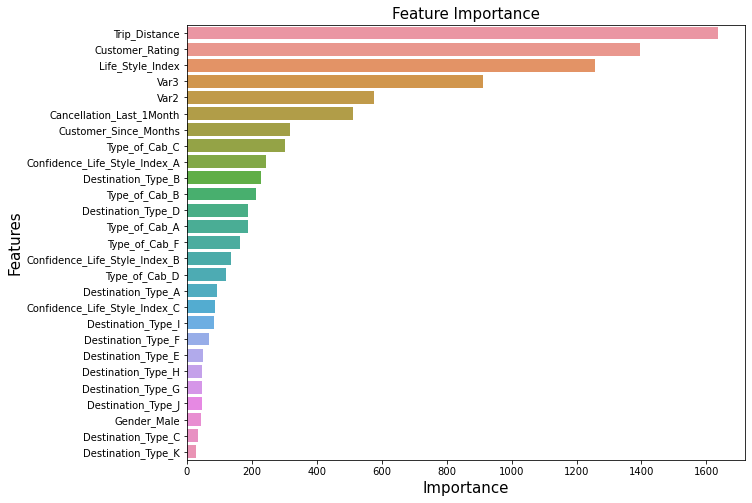

In [70]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': lgbmc.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [74]:
df_test.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689459,-1.768505,1.037875,-1.100919,0.846098,1.284153,-1.195084,-1.134465,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,T0005689462,-0.320094,1.037875,0.253438,-1.271090,-0.928235,-0.338789,0.563772,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,T0005689463,-1.680368,-0.578396,-0.451948,1.744324,-0.928235,-0.887310,0.051987,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,T0005689466,-1.307791,-0.029264,-1.571190,1.771993,-0.928235,-2.282568,-2.456677,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,T0005689468,-0.325670,0.240869,0.084090,1.850991,1.566074,-1.889798,-2.126905,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [75]:
test_probs = lgbmc.predict(df_test.drop("Trip_ID",axis=1))
test_probs

array([1., 2., 2., ..., 1., 2., 2.])

In [76]:
result = pd.DataFrame({"Trip_ID": df_test['Trip_ID'], 'Default': test_probs})
result.head()

,Trip_ID,Default
0,T0005689459,1.0
1,T0005689462,2.0
2,T0005689463,2.0
3,T0005689466,2.0
4,T0005689468,2.0


In [77]:
result["Default"].value_counts()

2.0    44616
3.0    29431
1.0    13348
Name: Default, dtype: int64

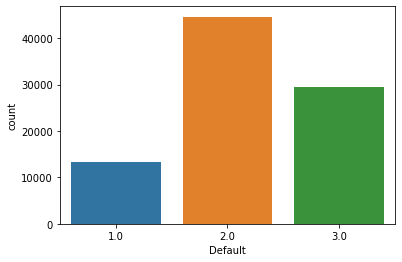

In [79]:
sns.countplot(result["Default"])
plt.show()

In [78]:
#Saving the data to an csv file
result.to_csv(r'C:\Users\sujit\SUJITH\Capstone.csv', index=False)

##### Hyperparameter Tuning for Light GBM

In [289]:
lgbmc = lgb.LGBMClassifier(random_state=4)
params = {"n_estimators":sp_randint(50,250),"max_depth":sp_randint(1,15),"learning_rate":sp_uniform(0,0.5)}
rsearch = RandomizedSearchCV(lgbmc,param_distributions=params,cv=3,n_iter=10,scoring="f1",n_jobs=-1,random_state=4)
rsearch.fit(x,y)
print("Best Params:",rsearch.best_params_)
print()

lgbmc_r = lgb.LGBMClassifier(**rsearch.best_params_,importance_type="gain",random_state=4)
lgbmc_r.fit(x_train,y_train)

y_train_pred = lgbmc_r.predict(x_train)
y_train_prob = lgbmc_r.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = lgbmc_r.predict(x_test)
y_test_prob = lgbmc_r.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best Params: {'learning_rate': 0.48351491950683834, 'max_depth': 8, 'n_estimators': 247}

TRAIN Data--------
CM: 
 [[13447  4228  1404]
 [ 1277 34701  3747]
 [  957  4940 27462]]
Accuracy:  0.8203943014007791
ROC:  0.9444932370922189
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.86      0.70      0.77     19079
         2.0       0.79      0.87      0.83     39725
         3.0       0.84      0.82      0.83     33359

    accuracy                           0.82     92163
   macro avg       0.83      0.80      0.81     92163
weighted avg       0.82      0.82      0.82     92163


TEST Data---------
CM: 
 [[ 4505  2524  1106]
 [ 1043 12803  3157]
 [  809  3857  9695]]
Accuracy:  0.6836375604445682
ROC:  0.8336997984820753
Classification Report: 
               precision    recall  f1-score   support

     

In [36]:
### Base Models without Hyperparameter Tuning
### Set seed for same results everytime
seed=0

lr = LogisticRegression()
rf=RandomForestClassifier()
weak_learner=DecisionTreeClassifier(max_depth=1,random_state=7)
adb = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=10,random_state=7)
lgbmc = lgb.LGBMClassifier()
bgc=BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=7)
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,
                  colsample_bytree=0.5,reg_alpha=0.000001)

models=[lr,rf,adb,lgbmc,bgc,gnb,knn,dt,bgcl_lr,xgb]
tr_acc_score,te_acc_score,sctr,scte,roc_acu_score,f1score,bias_error,variance_error,results=[],[],[],[],[],[],[],[],[]

def ens(x_train, x_test, y_train, y_test):
    for model in models:
            model.fit(x_train, y_train)
            kf = KFold(n_splits=5,shuffle=True,random_state=7)
            scorer = make_scorer(f1_score, average='weighted')
            score_best = cross_val_score(model, x, y, cv=kf, scoring=scorer)
            results.append(score_best)
            y_train_pred = model.predict(x_train)
            train_score = model.score(x_train,y_train)
            train_acc_score = accuracy_score(y_train,y_train_pred)
            y_test_pred = model.predict(x_test)
            test_score = model.score(x_test,y_test)
            test_acc_score = accuracy_score(y_test,y_test_pred)
            
            f1_sc=np.mean(score_best)
            bi_err = np.mean(1-score_best)
            var_err=np.std(score_best)
            
            tr_acc_score.append(train_acc_score)
            te_acc_score.append(test_acc_score)
            sctr.append(train_score)
            scte.append(test_score)
            f1score.append(f1_sc)
            bias_error.append(bi_err)
            variance_error.append(var_err)
            results.append(score_best)
    return tr_acc_score,te_acc_score,sctr,scte,f1score,variance_error
ens(x_train,x_test, y_train, y_test)

ensemble=pd.DataFrame({'Names':['Logistic Regression','Random Forest','Ada boost','Lgbm','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR','XGBoost'],
                       'Train_Accuracy_Score':tr_acc_score,
                       'Test_Accuracy_Score':te_acc_score,
                       'Training':sctr,
                       'Testing':scte,
                       'F1_score':f1score, 
                       "Bias_error":bias_error,
                       'Variance_error':variance_error})

[13:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [37]:
ensemble = ensemble.sort_values(by='F1_score', ascending=False).reset_index(drop=True)
ensemble

,Names,Train_Accuracy_Score,Test_Accuracy_Score,Training,Testing,F1_score,Bias_error,Variance_error
0,Lgbm,0.714734,0.700777,0.714734,0.700777,0.697529,0.302471,0.001952
1,XGBoost,0.702494,0.698068,0.702494,0.698068,0.694737,0.305263,0.001069
2,Logistic Regression,0.691883,0.692726,0.691883,0.692726,0.689239,0.310761,0.002847
3,bagged LR,0.691818,0.692220,0.691818,0.692220,0.689155,0.310845,0.002933
4,Random Forest,0.999989,0.690347,0.999989,0.690347,0.687688,0.312312,0.002841
5,Ada boost,0.663433,0.664169,0.663433,0.664169,0.671345,0.328655,0.004466
6,Bagging,0.983377,0.659662,0.983377,0.659662,0.658133,0.341867,0.002114
7,KNN,0.742793,0.637662,0.742793,0.637662,0.639695,0.360305,0.002556
8,Naive-Bayes,0.624578,0.627332,0.624578,0.627332,0.611985,0.388015,0.002688
9,Decistion Tree,1.000000,0.572470,1.000000,0.572470,0.575185,0.424815,0.001379


In [61]:
from sklearn.ensemble import VotingClassifier

soft_voting=VotingClassifier(estimators=[('Light GBM',lgbmc),('XgBoost',xgb),
                                         ('Logistic Regression',lr)],voting='soft')

weighted_soft=VotingClassifier(estimators=[('Light GBM',lgbmc),('XgBoost',xgb),
                                         ('Logistic Regression',lr)],weights=[3,1,2],voting='soft')

In [72]:
### Soft Voting
soft_voting.fit(x_train, y_train)
y_pred = soft_voting.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Train score: {}".format(soft_voting.score(x_train, y_train)))
print("Test score: {}".format(soft_voting.score(x_test, y_test)))
print(confusion_matrix(y_test,y_pred), '\n')
print(classification_report(y_test,y_pred))

[16:34:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.6991569406820426
Train score: 0.7054891876349512
Test score: 0.6991569406820426
[[ 4515  2656   964]
 [  743 13597  2663]
 [  750  4107  9504]] 

              precision    recall  f1-score   support

         1.0       0.75      0.56      0.64      8135
         2.0       0.67      0.80      0.73     17003
         3.0       0.72      0.66      0.69     14361

    accuracy                           0.70     39499
   macro avg       0.71      0.67      0.69     39499
weighted avg       0.71      0.70      0.70     39499



In [73]:
### Weighted-Soft
weighted_soft.fit(x_train, y_train)
y_pred = weighted_soft.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Train score: {}".format(soft_voting.score(x_train, y_train)))
print("Test score: {}".format(soft_voting.score(x_test, y_test)))
print(confusion_matrix(y_test,y_pred), '\n')
print(classification_report(y_test,y_pred))

[16:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.6995113800349376
Train score: 0.7054891876349512
Test score: 0.6991569406820426
[[ 4521  2654   960]
 [  755 13599  2649]
 [  737  4114  9510]] 

              precision    recall  f1-score   support

         1.0       0.75      0.56      0.64      8135
         2.0       0.67      0.80      0.73     17003
         3.0       0.72      0.66      0.69     14361

    accuracy                           0.70     39499
   macro avg       0.71      0.67      0.69     39499
weighted avg       0.71      0.70      0.70     39499



In [295]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import svm

bgc = BaggingClassifier(random_state=7)
adb = AdaBoostClassifier(random_state=7)
gbc = GradientBoostingClassifier(random_state=7)
svc = svm.SVC(random_state=7)

In [296]:
from sklearn.ensemble import VotingClassifier

soft_voting=VotingClassifier(estimators=[('Bagging',bgc),('LGBM Tunned ',lgbmc_r),
                                         ('Random Forest ',rf)],voting='soft')

weighted_soft=VotingClassifier(estimators=[('Bagging',bgc),('LGBM Tunned ',lgbmc_r),
                                           ('Random Forest ',rf)],weights=[3,1,2],voting='soft')

In [297]:
### Soft Voting
soft_voting.fit(x_train, y_train)
y_pred = soft_voting.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Train score: {}".format(soft_voting.score(x_train, y_train)))
print("Test score: {}".format(soft_voting.score(x_test, y_test)))
print(confusion_matrix(y_test,y_pred), '\n')
print(classification_report(y_test,y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy score: 0.6917896655611534
Train score: 0.982661154693315
Test score: 0.6917896655611534
[[ 4509  2551  1075]
 [  868 13152  2983]
 [  787  3910  9664]] 

              precision    recall  f1-score   support

         1.0       0.73      0.55      0.63      8135
         2.0       0.67      0.77      0.72     17003
         3.0       0.70      0.67      0.69     14361

    accuracy                           0.69     39499
   macro avg       0.70      0.67      0.68     39499
weighted avg       0.70      0.69      0.69     39499



In [298]:
### Weighted-Soft
weighted_soft.fit(x_train, y_train)
y_pred = weighted_soft.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Train score: {}".format(soft_voting.score(x_train, y_train)))
print("Test score: {}".format(soft_voting.score(x_test, y_test)))
print(confusion_matrix(y_test,y_pred), '\n')
print(classification_report(y_test,y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy score: 0.68624522139801
Train score: 0.982661154693315
Test score: 0.6917896655611534
[[ 4517  2547  1071]
 [  905 13029  3069]
 [  841  3960  9560]] 

              precision    recall  f1-score   support

         1.0       0.72      0.56      0.63      8135
         2.0       0.67      0.77      0.71     17003
         3.0       0.70      0.67      0.68     14361

    accuracy                           0.69     39499
   macro avg       0.70      0.66      0.67     39499
weighted avg       0.69      0.69      0.68     39499



### Overall Model Comparison

In [300]:
# models=[]
# models.append(('Logistic',lc))
# models.append(('Decision Tree',dt))
# models.append(('Decision Tree Tuned',dt_mod_r))
# models.append(('Random Forest',rf))
# models.append(('Random Forest Tuned',rf_r))
# models.append(('KNN',knn))
# models.append(('Naive Bayes',gnb))
# models.append(('XG Boost',xgb))
# models.append(('LGBM',lgbmc))
# models.append(('LGBM Tunned',lgbmc_r))
# models.append(('Bagging',bgc))
# models.append(('Ada-Boost',adb))
# models.append(('Gradient Boost',gbc))
# models.append(('SVM',svc))
# models.append(('Soft Voting',soft_voting))
# models.append(('Weighted Soft Voting',weighted_soft))

In [ ]:
# results = []
# acc_score = []
# auc_score = []
# bias = []
# variance = []
# f1_score = []
# precision_score = []
# recall_score = []
# names = []

# for name,model in models:
#     kfold = KFold(shuffle=True,n_splits=5,random_state=7)
#     cv_results = cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
#     results.append(cv_results)
#     bias.append(np.mean(1-cv_results))
#     variance.append(np.var(cv_results,ddof=1))    
#     auc_score.append(np.mean(cv_results)) 
    
#     f1 = cross_val_score(model,x,y,cv=kfold,scoring='f1_weighted')
#     f1_score.append(np.mean(f1))
    
#     acc=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
#     acc_score.append(np.mean(acc))
    
#     p=cross_val_score(model,x,y,cv=kfold,scoring='precision_weighted')
#     precision_score.append(np.mean(p))
    
#     r=cross_val_score(model,x,y,cv=kfold,scoring='recall_weighted')
#     recall_score.append(np.mean(r))
    
#     names.append(name)
    
# model_df=pd.DataFrame({'Model':names,'Accuracy Score':acc_score,'ROC-AUC Score':auc_score,'Variance Error':variance,
#                        'Bias Error': bias,'F1 Score':f1_score,'Precision Score':precision_score,
#                        'Recall Score':recall_score})

In [ ]:
# model_df = model_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
# model_df

In [ ]:
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(shuffle=True,n_splits=5,random_state=0)
#     cv_results = cross_val_score(model, x, y,cv=kfold, scoring='f1_weighted')
#     results.append(np.sqrt(np.abs(cv_results)))
#     names.append(name)
#     print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
#    # boxplot algorithm comparison
# fig = plt.figure(figsize=(22,8))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# xgboost = XGBClassifier()
# or
# xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,
#                  colsample_bytree=0.5,reg_alpha=0.000001)
# xgboost.fit(x_train, y_train)
# y_pred = xgboost.predict(x_test)
### hyper Tuning for Xgboost
# params = {'max_depth': range(3,10,2), 'min_child_weight':range(1,6,2)}

# xg_hyp_mod = GridSearchCV(estimator=XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
#                            min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#                            nthread=4, scale_pos_weight=1), param_grid = params, n_jobs=4, cv=5)

# xg_hyp_mod.fit(x,y)

### 80:20 ratio

In [32]:
x = df_train.drop(["Surge_Pricing_Type","Trip_ID"],axis=1)
y = df_train["Surge_Pricing_Type"]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [38]:
### Base Models without Hyperparameter Tuning
### Set seed for same results everytime
seed=0

lr = LogisticRegression()
rf=RandomForestClassifier()
weak_learner=DecisionTreeClassifier(max_depth=1,random_state=7)
adb = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=10,random_state=7)
lgbmc = lgb.LGBMClassifier()
bgc=BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=7)
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,
                  colsample_bytree=0.5,reg_alpha=0.000001 )

models=[lr,rf,adb,lgbmc,bgc,gnb,knn,dt,bgcl_lr,xgb]
tr_acc_score,te_acc_score,sctr,scte,roc_acu_score,f1score,bias_error,variance_error,results=[],[],[],[],[],[],[],[],[]

def ens(x_train, x_test, y_train, y_test):
    for model in models:
            model.fit(x_train, y_train)
            kf = KFold(n_splits=5,shuffle=True,random_state=7)
            scorer = make_scorer(f1_score, average='weighted')
            score_best = cross_val_score(model, x, y, cv=kf, scoring=scorer)
            results.append(score_best)
            y_train_pred = model.predict(x_train)
            train_score = model.score(x_train,y_train)
            train_acc_score = accuracy_score(y_train,y_train_pred)
            y_test_pred = model.predict(x_test)
            test_score = model.score(x_test,y_test)
            test_acc_score = accuracy_score(y_test,y_test_pred)
            
            f1_sc=np.mean(score_best)
            bi_err = np.mean(1-score_best)
            var_err=np.std(score_best)
            
            tr_acc_score.append(train_acc_score)
            te_acc_score.append(test_acc_score)
            sctr.append(train_score)
            scte.append(test_score)
            f1score.append(f1_sc)
            bias_error.append(bi_err)
            variance_error.append(var_err)
            results.append(score_best)
    return tr_acc_score,te_acc_score,sctr,scte,f1score,variance_error
ens(x_train,x_test, y_train, y_test)

ensemble=pd.DataFrame({'Names':['Logistic Regression','Random Forest','Ada boost','Lgbm','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR','XGBoost'],
                       'Train_Accuracy_Score':tr_acc_score,
                       'Test_Accuracy_Score':te_acc_score,
                       'Training':sctr,
                       'Testing':scte,
                       'F1_score':f1score, 
                       "Bias_error":bias_error,
                       'Variance_error':variance_error})

[00:40:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [39]:
ensemble = ensemble.sort_values(by='F1_score', ascending=False).reset_index(drop=True)
ensemble

,Names,Train_Accuracy_Score,Test_Accuracy_Score,Training,Testing,F1_score,Bias_error,Variance_error
0,Lgbm,0.712216,0.703604,0.712216,0.703604,0.697529,0.302471,0.001952
1,XGBoost,0.701678,0.700604,0.701678,0.700604,0.694737,0.305263,0.001069
2,Logistic Regression,0.691215,0.695781,0.691215,0.695781,0.689239,0.310761,0.002847
3,bagged LR,0.691272,0.694718,0.691272,0.694718,0.689155,0.310845,0.002933
4,Random Forest,0.999991,0.692515,0.999991,0.692515,0.687580,0.312420,0.002411
5,Ada boost,0.668819,0.671857,0.668819,0.671857,0.671345,0.328655,0.004466
6,Bagging,0.983423,0.660996,0.983423,0.660996,0.659571,0.340429,0.002307
7,KNN,0.742217,0.641325,0.742217,0.641325,0.639695,0.360305,0.002556
8,Naive-Bayes,0.623893,0.626742,0.623893,0.626742,0.611985,0.388015,0.002688
9,Decistion Tree,1.000000,0.575438,1.000000,0.575438,0.574668,0.425332,0.002074


In [40]:
lgbmc = lgb.LGBMClassifier(random_state=4)
lgbmc.fit(x_train,y_train)

y_train_pred = lgbmc.predict(x_train)
y_train_prob = lgbmc.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = lgbmc.predict(x_test)
y_test_prob = lgbmc.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[12226  7067  2516]
 [ 2012 36811  6520]
 [ 1821 10376 25980]]
Accuracy:  0.7122160088864415
ROC:  0.8643912074216203
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.76      0.56      0.65     21809
         2.0       0.68      0.81      0.74     45343
         3.0       0.74      0.68      0.71     38177

    accuracy                           0.71    105329
   macro avg       0.73      0.68      0.70    105329
weighted avg       0.72      0.71      0.71    105329


TEST Data---------
CM: 
 [[2994 1716  695]
 [ 523 9146 1716]
 [ 450 2705 6388]]
Accuracy:  0.7036038430866214
ROC:  0.850312762974037
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.75      0.55      0.64      5405
         2.0       0.67      0.80      0.73     11385
         3.0       0.73      0.67      0.70      9543

    accuracy                           0.70     26333
   macro avg      